<a href="https://colab.research.google.com/github/raghavdw/data_science_basics/blob/main/Singular_Value_Decomposition_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Value Decompositions

In [1]:
import numpy as np
import pandas as pd

### Initialize the matrix

In [2]:
mat = np.array([[4, 2, 2],
                [3, 4, 1],
                [6, 7, 2]])

### Singular Value Decomposition

Singular Value Decomposition is a factorization technique that decomposes a given matrix \( A \) into three other matrices \( U \), \( $Sigma$ ), and \( $V^T$ \). The decomposition can be represented as:


$A = U \Sigma V^T$

#### Components of SVD

- **\( U \)**: An \( $m \times m$ \) orthogonal matrix, containing the left singular vectors.
- **\( $Sigma$ \)**: An \( $m \times n $\) diagonal matrix with non-negative values called singular values.
    - These are arranged in descending order.
- **\( $V^T$ \)**: An \( $n \times n$ \) orthogonal matrix, containing the right singular vectors.

#### Properties

1. **Orthogonality**: Both \( U \) and \( V \) are orthogonal matrices.
2. **Non-Negativity**: Singular values in \( $\Sigma$ \) are always non-negative.
3. **Ordering**: Singular values in \( $\Sigma$ \) are sorted in descending order.

#### Applications

- **Data Compression**: Truncated SVD for image and data compression.
- **Machine Learning**: Principal Component Analysis (PCA), Latent Semantic Analysis (LSA).
- **Numerical Stability**: Used in solving ill-conditioned linear systems.

In [3]:
U, s, Vh = np.linalg.svd(mat, full_matrices=False)

In [4]:
U

array([[-0.39238083,  0.91021976, -0.13242839],
       [-0.43543486, -0.31063767, -0.84492646],
       [-0.810206  , -0.273869  ,  0.51822968]])

In [5]:
s

array([11.624865  ,  1.96337343,  0.08762725])

In [6]:
Vh

array([[-0.66556161, -0.7052076 , -0.24435626],
       [ 0.54281675, -0.68208838,  0.49000553],
       [ 0.51222819, -0.1934882 , -0.83677034]])

### Are the column vectors orthgonal?

In [ ]:
dotp = np.round(np.dot(U[:, 0], U[:, 1]), 2)
dotp

**Note:** What does dot product 0.0 mean?

In [ ]:
# Check if the vector is a unit vector
is_orthogonal = np.isclose(dotp, 0.0)

print("Are the vectors orthogonal to each other?", is_orthogonal)

### Are the vectors unit vectors?

In [ ]:
# Calculate the Euclidean norm
norm = np.linalg.norm(U[:, 0])
norm

In [ ]:
# Check if the vector is a unit vector
is_unit_vector = np.isclose(norm, 1.0)

print("Is the vector a unit vector?", is_unit_vector)

### Cosine Similarity between two vectors

Cosine similarity is a metric used to measure how similar two vectors are. It is defined as the cosine of the angle between the vectors, which can be calculated using the dot product of the vectors and their magnitudes (Euclidean norms).

The cosine similarity between two vectors \( A \) and \( B \) is given by:


$\text{Cosine Similarity} = \frac{{A \cdot B}}{{||A|| \times ||B||}}$

Here, \( $A \cdot B$ \) is the dot product of \( A \) and \( B \), and \( ||A|| \) and \( ||B|| \) are the Euclidean norms of \( A \) and \( B \) respectively.

#### Interpretation

- A value of 1 implies that the vectors are identical.
- A value of 0 implies that the vectors are orthogonal (i.e., not similar).
- A value of -1 implies that the vectors are diametrically opposed.

In [ ]:
norm_A = np.linalg.norm(U[:, 0])
norm_B = np.linalg.norm(U[:, 1])

cosine_similarity = dotp / (norm_A * norm_B)

print("Cosine Similarity:", cosine_similarity)

**Note:** A value of 0 implies that the vectors are orthogonal (i.e., not similar).

### What happens if the first eigen vectors and values are taken?

In [8]:
U[:, :1]

array([[-0.39238083],
       [-0.43543486],
       [-0.810206  ]])

In [11]:
Vh[:1, :]

array([[-0.66556161, -0.7052076 , -0.24435626]])

In [10]:
s[:1]

array([11.624865])

In [12]:
mat_1 = U[:, :1] @ np.diag(s[:1]) @ Vh[:1, :]
np.round(mat_1, 1)

array([[3. , 3.2, 1.1],
       [3.4, 3.6, 1.2],
       [6.3, 6.6, 2.3]])

In [13]:
np.allclose(mat, mat_1)

False

### What happens if the second eigen vectors and values are taken?

In [14]:
mat_12 = U[:, 1:2] @ np.diag(s[1:2]) @ Vh[1:2, :]
np.round(mat_12, 1)

array([[ 1. , -1.2,  0.9],
       [-0.3,  0.4, -0.3],
       [-0.3,  0.4, -0.3]])

### Add both the matrices

In [15]:
np.round(mat_1 + mat_12, 1)

array([[4. , 2. , 2. ],
       [3. , 4. , 0.9],
       [6. , 7. , 2. ]])

### What happens if the two eigen vectors and values are taken?

In [16]:
mat_2 = mat_1 = U[:, :2] @ np.diag(s[:2]) @ Vh[:2, :]
np.round(mat_2, 1)

array([[4. , 2. , 2. ],
       [3. , 4. , 0.9],
       [6. , 7. , 2. ]])

In [17]:
mat

array([[4, 2, 2],
       [3, 4, 1],
       [6, 7, 2]])

In [18]:
np.allclose(mat, mat_2)

False

**Note:** But the resulting matrix is very close to the above original matrix?

### What happens if the all eigen vectors and values are taken?

In [ ]:
mat_3 = U @ np.diag(s) @ Vh
np.round(mat_3, 1)

In [ ]:
mat

In [ ]:
np.allclose(mat, mat_3)

## If a square matrix is orthgonal?

A square matrix \( A \) is orthogonal if it satisfies the following mathematical condition:

$A^T A = AA^T = I
$

Here, $( A^T )$ is the transpose of \( A \), and \( I \) is the identity matrix of the same dimension as \( A \).


In [ ]:
np.round(U @ U.T, 2)

In [ ]:
np.round(Vh @ Vh.T, 2)

In [ ]:
np.eye(U.shape[0])

## What about SVD of Symmetric Matrix?

In [ ]:
smat = np.array([[1, 2, 3],
                 [2, 4, 5],
                 [3, 5, 6]])

In [ ]:
U_vec_s, sigma_s, V_vec_s = np.linalg.svd(smat, full_matrices = False)

In [ ]:
U_vec_s

In [ ]:
V_vec_s.T

In [ ]:
np.matrix(U_vec_s * np.diag(sigma_s) * V_vec_s)

# Application: Image Compression

In [19]:
import matplotlib.pyplot as plt
import urllib3

In [33]:
from PIL import Image
import requests
from io import BytesIO

image_url = '/content/drive/MyDrive/raghav-profile-pic.png'
#response = requests.get(image_url)
smiling = Image.open(image_url)

In [34]:
smiling = np.array(smiling)

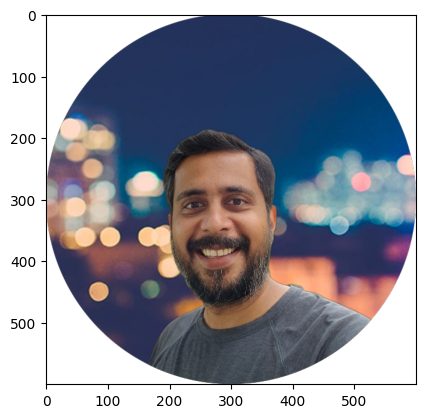

In [35]:
plt.imshow( smiling );

In [36]:
smiling.shape

(600, 600, 4)

In [37]:
grayscale = smiling[:, :, :1]

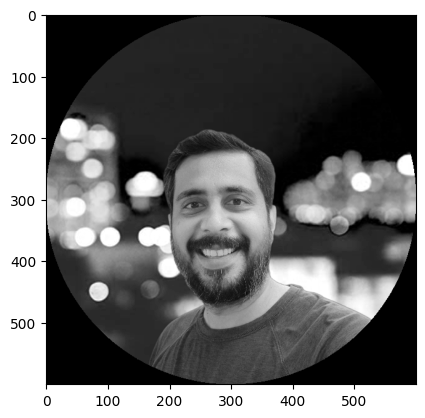

In [38]:
plt.imshow( grayscale, cmap='gray' );

In [39]:
grayscale.shape

(600, 600, 1)

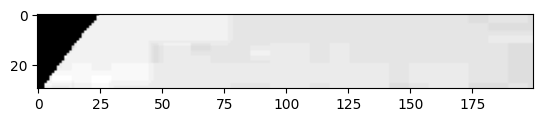

In [40]:
plt.imshow( grayscale[100:130, 50:250], cmap='gray' );

### SVD of Image Matrix

In [41]:
U_vec, sigma, V_vec = np.linalg.svd(np.matrix(grayscale))

### Using the first vectors

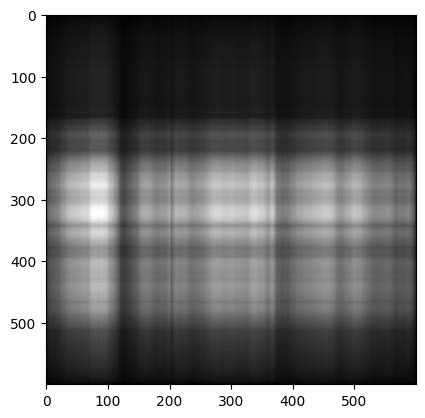

In [42]:
image_1_vec = U_vec[:, :1] @ np.diag(sigma[:1]) @ V_vec[:1, :]
plt.imshow(image_1_vec, cmap='gray');

### Using 10 vectors

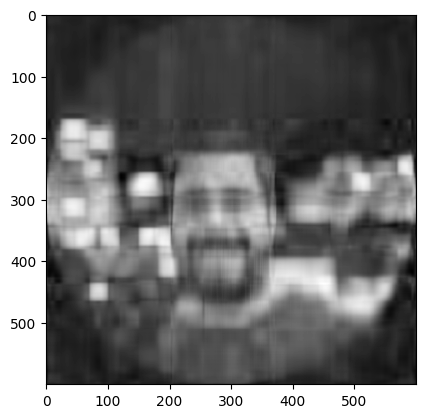

In [45]:
image_1_vec = U_vec[:, :10] @ np.diag(sigma[:10]) @ V_vec[:10, :]
plt.imshow(image_1_vec, cmap='gray');

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Using 50 vectors

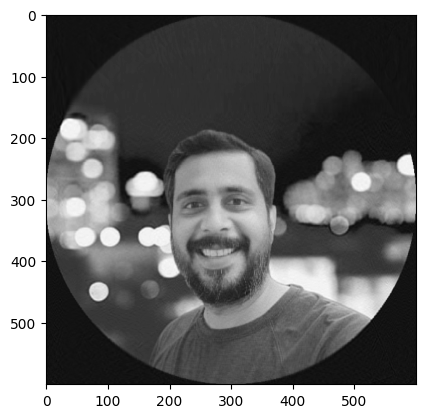

In [64]:
image_1_vec = U_vec[:, :100] @ np.diag(sigma[:100]) @ V_vec[:100, :]
plt.imshow(image_1_vec, cmap='gray');

In [47]:
sigma.shape

(600,)

### How many numbers?

In [66]:
U_vec[:, :100].shape

(600, 100)

In [67]:
U_vec[:, :100].shape[0] * U_vec[:, :100].shape[1]

60000

In [68]:
num_vals = 2 * (U_vec[:, :100].shape[0] * U_vec[:, :100].shape[1]) + sigma[:100].shape[0]

In [51]:
num_vals

60050

In [70]:
grayscale.shape[0] * grayscale.shape[1]

360000

In [71]:
num_vals / (grayscale.shape[0] * grayscale.shape[1])

0.33361111111111114

## How much information is explained and how much is lost?

In [72]:
total_variance = np.sum( sigma )

In [73]:
np.round(sigma, 2)[0:10]

array([49732.2 , 18011.82, 13082.46, 10854.69,  9143.68,  7787.71,
        6102.6 ,  5096.89,  4277.03,  3836.21])

In [74]:
np.round(sigma, 2)[-10:]

array([0.39, 0.35, 0.32, 0.2 , 0.19, 0.14, 0.09, 0.08, 0.07, 0.  ])

In [75]:
var_explained = np.round([(eig_val/total_variance) for eig_val in sigma], 3)

In [76]:
var_explained_cumm = np.cumsum( var_explained )

In [77]:
var_explained_df = pd.DataFrame( {'component': range(1,275),
                              'variance': var_explained[0:274],
                              'var_cumsum': var_explained_cumm[0:274]} )

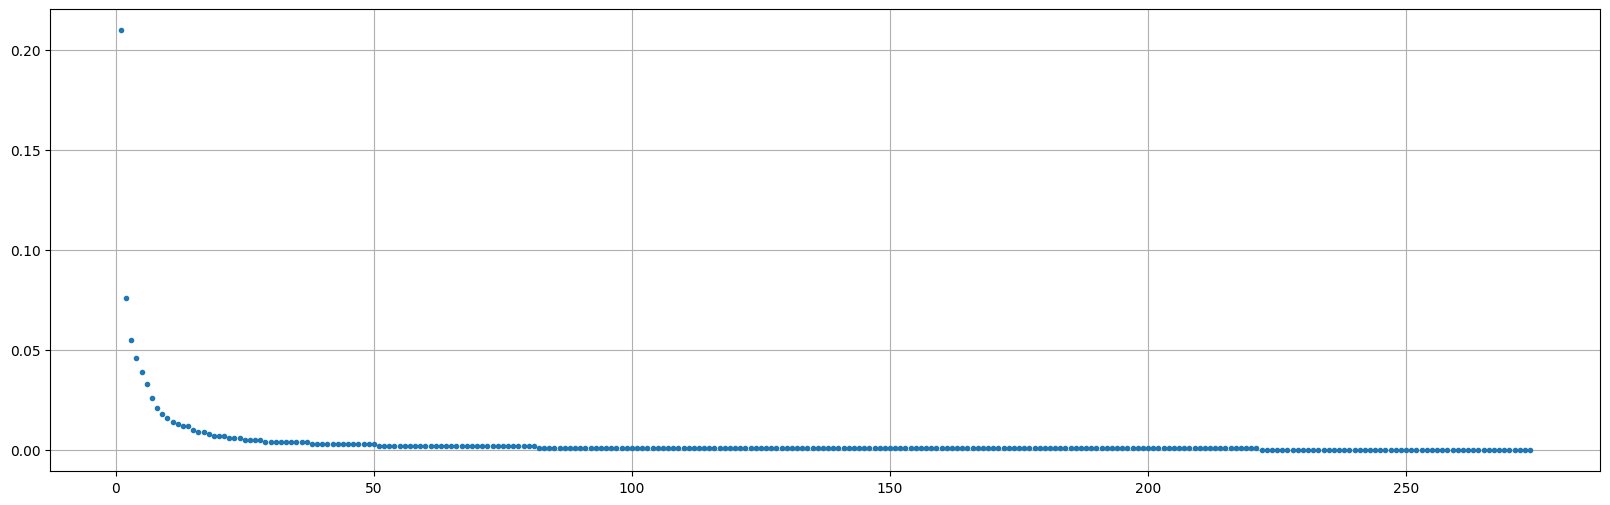

In [78]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.variance,
         '.');

In [79]:
var_explained_df[0:50]

,component,variance,var_cumsum
0,1,0.210,0.210
1,2,0.076,0.286
2,3,0.055,0.341
3,4,0.046,0.387
4,5,0.039,0.426
5,6,0.033,0.459
6,7,0.026,0.485
7,8,0.021,0.506
8,9,0.018,0.524
9,10,0.016,0.540


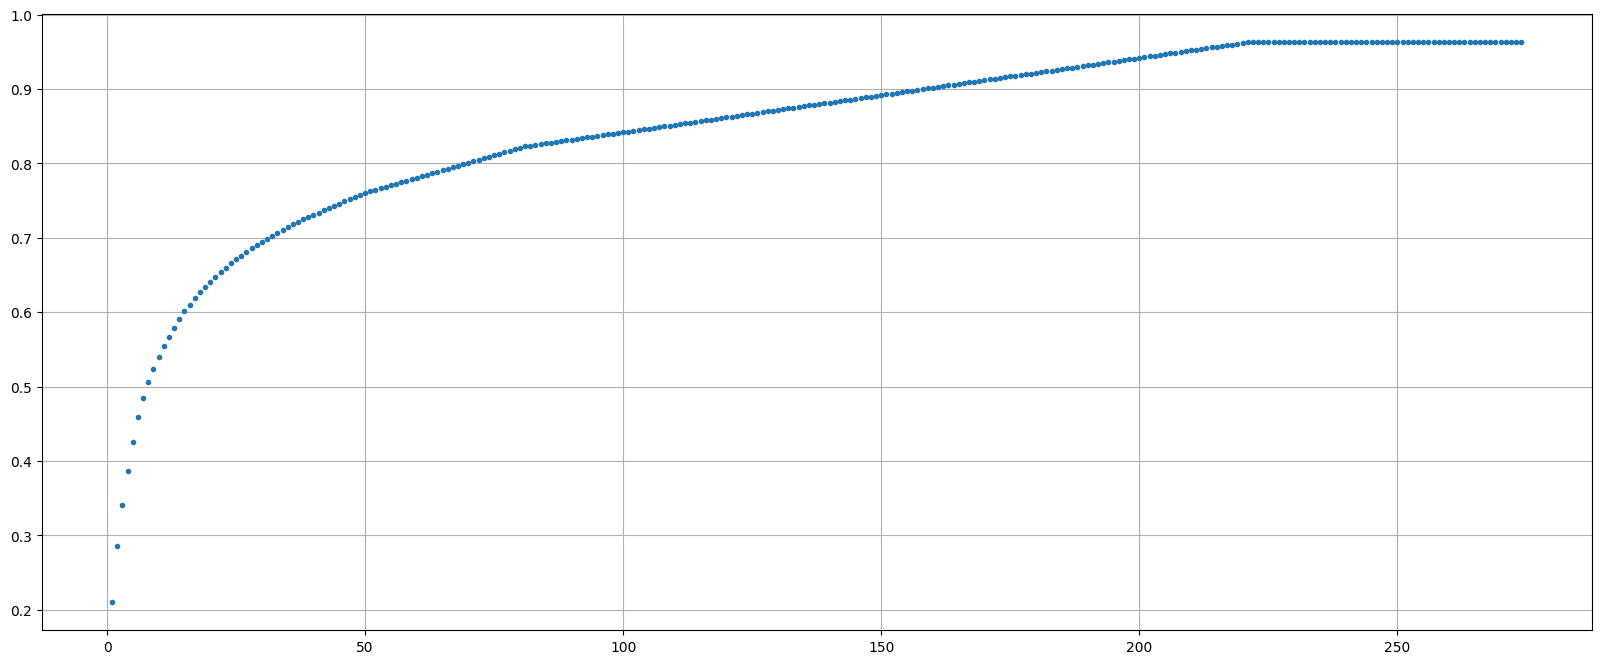

In [80]:
plt.figure(figsize = (20, 8))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.var_cumsum,
         '.');